Q1. MLP

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df = pd.read_csv('adult(in).csv')

Subdivision 1:

In [ ]:
#Checking null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [4]:
df.drop('fnlwgt',axis=1,inplace=True)

In [5]:
df['income']=df['income'].map({'<=50K':0,'>50K':1})

In [6]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [7]:
l = LabelEncoder()
df['workclass'] = l.fit_transform(df['workclass'])
df['educaion'] = l.fit_transform(df['education'])
df['marital-status'] = l.fit_transform(df['marital-status'])
df['occupation'] = l.fit_transform(df['occupation'])
df['relationship'] = l.fit_transform(df['relationship'])
df['race'] = l.fit_transform(df['race'])
df['gender'] = l.fit_transform(df['gender'])
df['income'] = l.fit_transform(df['income'])
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,educaion
0,25,4,11th,7,4,7,3,2,1,0,0,40,United-States,0,1
1,38,4,HS-grad,9,2,5,0,4,1,0,0,50,United-States,0,11
2,28,2,Assoc-acdm,12,2,11,0,4,1,0,0,40,United-States,1,7
3,44,4,Some-college,10,2,7,0,2,1,7688,0,40,United-States,1,15
4,18,0,Some-college,10,4,0,3,4,0,0,0,30,United-States,0,15


In [8]:
df['native-country'] = l.fit_transform(df['native-country'])

In [9]:
df['education'] = l.fit_transform(df['education'])

In [10]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,educaion
0,25,4,1,7,4,7,3,2,1,0,0,40,39,0,1
1,38,4,11,9,2,5,0,4,1,0,0,50,39,0,11
2,28,2,7,12,2,11,0,4,1,0,0,40,39,1,7
3,44,4,15,10,2,7,0,2,1,7688,0,40,39,1,15
4,18,0,15,10,4,0,3,4,0,0,0,30,39,0,15


In [11]:
x = df.drop(columns='income',axis=1)
y = df['income']

In [12]:
print(df['income'])

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64


In [13]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

y_oneho = tf.keras.utils.to_categorical(y, num_classes=3)

X_train, X_test, y_train, y_test = train_test_split(x_scaler, y_oneho, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape)
print(y_train.shape)


(39073, 14)
(39073, 3)


Subdivision 2:

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),  
    tf.keras.layers.Dense(3, activation='softmax')  
])

c:\Users\kanih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=30, validation_split=0.2)

Epoch 1/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7697 - loss: 0.3208 - val_accuracy: 0.8380 - val_loss: 0.2273
Epoch 2/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8473 - loss: 0.2141 - val_accuracy: 0.8390 - val_loss: 0.2246
Epoch 3/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8509 - loss: 0.2131 - val_accuracy: 0.8389 - val_loss: 0.2251
Epoch 4/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8472 - loss: 0.2180 - val_accuracy: 0.8392 - val_loss: 0.2261
Epoch 5/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8525 - loss: 0.2105 - val_accuracy: 0.8392 - val_loss: 0.2226
Epoch 6/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8461 - loss: 0.2157 - val_accuracy: 0.8407 - val_loss: 0.2275
Epoch 7/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8530 - loss: 0.2089 - val_accuracy: 0.8393 - val_loss: 0.2218
Epoch 8/50
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8497 - loss: 0.2133 - 

Subdivision 3:

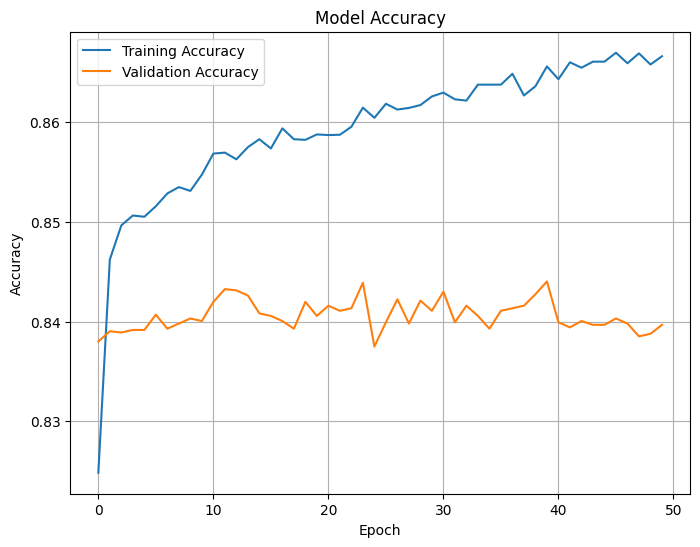

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

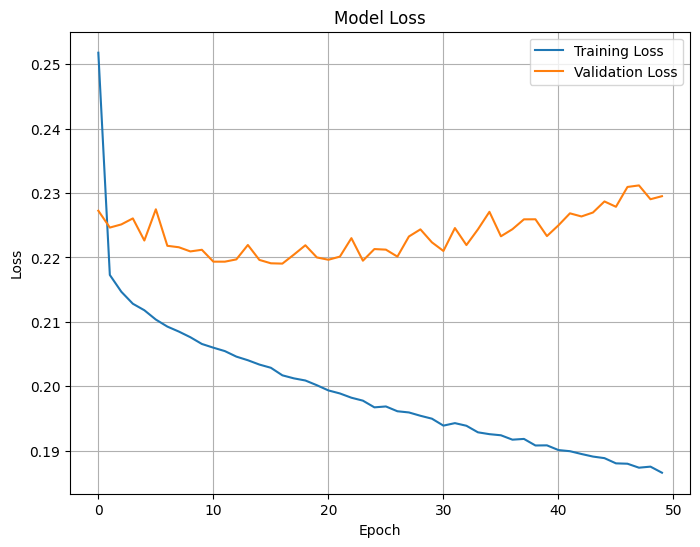

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Q2.Activation functions(ELU and Tanh)

In [19]:
def tanh(x):
    return np.tanh(x)

def der_tanh(x):
    return 1 - np.tanh(x)**2

In [20]:
def elu(x,alpha=1.0):
    return np.where(x>0,x,alpha*(np.exp(x)-1))

def der_elu(x,alpha=1.0):
    return np.where(x>0,1, alpha*np.exp(x))

In [21]:
x = np.linspace(1,10,100)

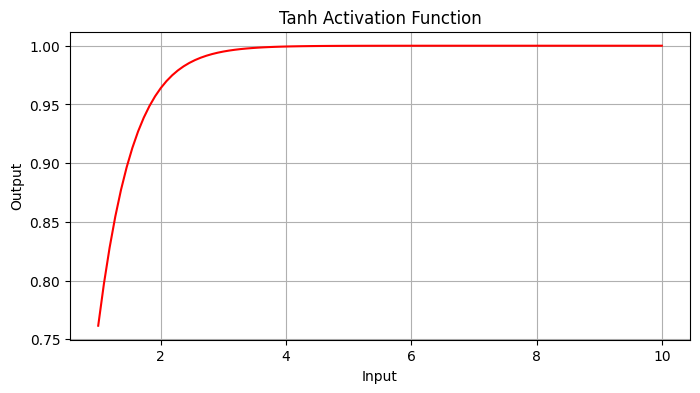

In [22]:
y = tanh(x)
z = der_tanh(x)

plt.figure(figsize=(8,4))
plt.plot(x,y,label='Tanh Function',color='red')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

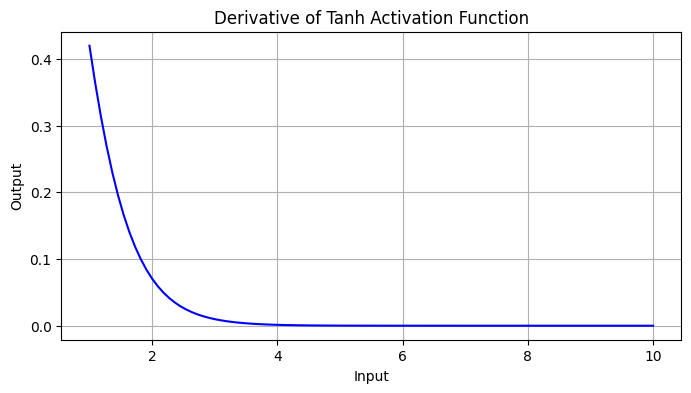

In [23]:
plt.figure(figsize=(8,4))
plt.plot(x,z,label='Derivative of Tanh Function',color='blue')
plt.title('Derivative of Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

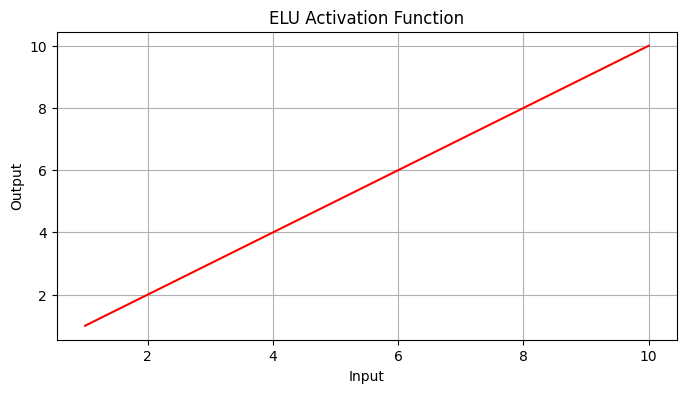

In [24]:
k = elu(x)
m = der_elu(x)

plt.figure(figsize=(8,4))
plt.plot(x,k,label='ELU Function',color='red')
plt.title('ELU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

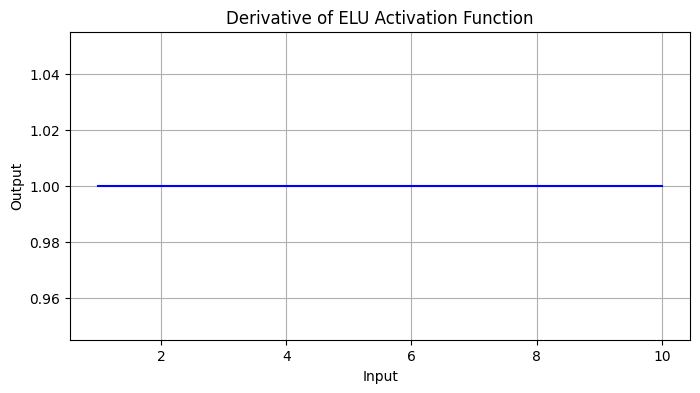

In [25]:
plt.figure(figsize=(8,4))
plt.plot(x,m,label='Derivativ of ELU Function',color='blue')
plt.title('Derivative of ELU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()